# 平板樣式與運動軌跡

In [2]:
import h5py
from matplotlib import colors
import numpy as np
import os
import scipy.signal as signal
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme(style="white", font_scale=3)

In [3]:
mat_path = '/home/jovyan/dataset/indy/Sorted_Spike_Dataset'  # mat file path
mat_list = os.listdir(mat_path)
mat_f = mat_list[26] # choose session
mat_fp = os.path.join(mat_path, mat_f) 
matfile = h5py.File(mat_fp, 'r')
Ses_n = mat_f.split('.')[0]

In [4]:
def _pannel(X, Y):
    Px, Py = [], []
    for r in range(len(Y)):
        for c in range(len(X)):
            Px.append(X[c])
            Py.append(Y[r])
    return Px, Py

def _trail_idx(target):
    diff_bef = []
    X0, X1 = target[0, :-1], target[0, 1:]
    Y0, Y1 = target[1, :-1], target[1, 1:]
    for i in range(len(X0)):
        if (X0[i] - X1[i])!=0 or (Y0[i] - Y1[i])!=0:
            diff_bef.append(i)
    return diff_bef

In [5]:
target = np.array(matfile['target_pos'])
finger = np.array(matfile['finger_pos'])
t = np.array(matfile['t'])[0]

df = pd.DataFrame(columns=[])
df_kin = pd.DataFrame(columns=[])

pannel_X, pannel_Y = np.sort(np.unique(target[0, :])), np.sort(np.unique(target[1, :]))
Px, Py = _pannel(pannel_X, pannel_Y)

df['pannel_x'],  df['pannel_y']= Px, Py
pos = np.concatenate((finger[1, :] * -10, finger[2, :] * -10)).tolist()
df_kin['position (mm)'] = pos
df_kin['time (s)'] = np.array([t for i in range(2)]).flatten()
df_kin['axis'] = [axx for axx in ['coordinate x', 'coordinate y'] for i in range(len(t))]

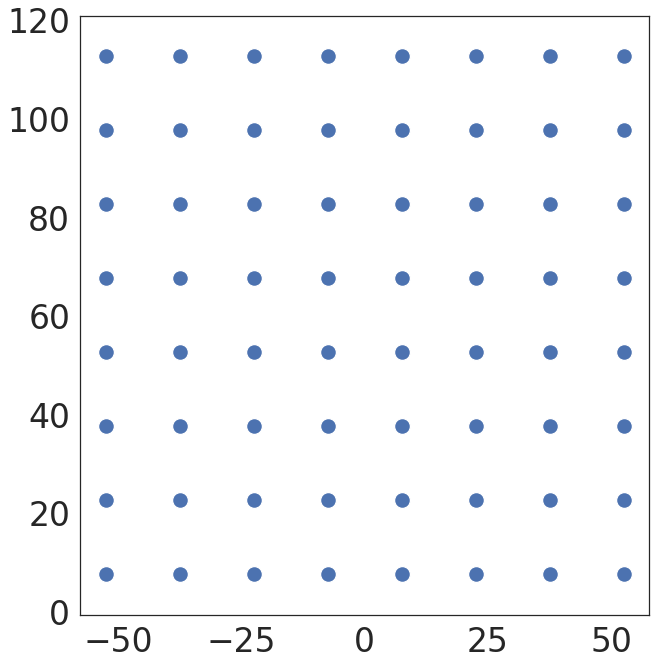

In [6]:
fig = plt.figure(figsize=(10,10))
g1 = sns.scatterplot(data=df, x="pannel_x", y="pannel_y", s=250)
g1.set(xlabel=None, ylabel=None)
plt.axis('equal')
plt.tight_layout()

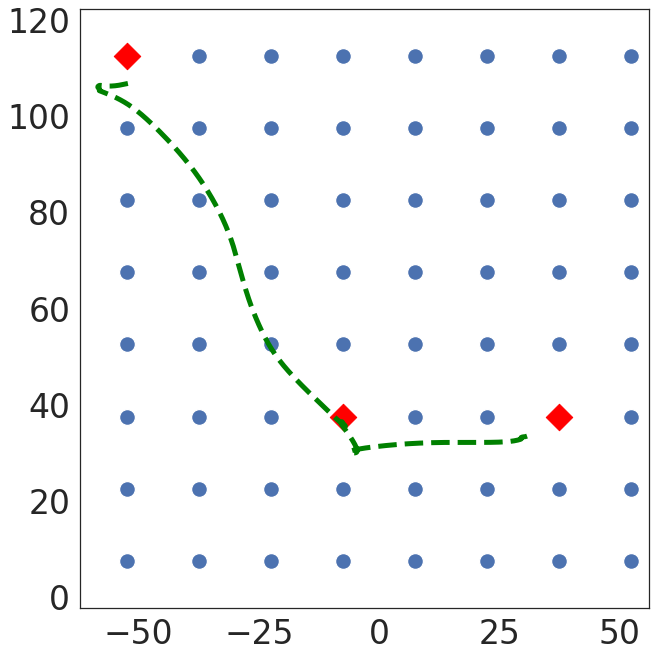

In [7]:
diff_idx_bef = _trail_idx(target)
trail = 1  # choose trail
trail_end_0 = diff_idx_bef[trail]
trail_end_1 = diff_idx_bef[trail + 1]
trail_end_2 = diff_idx_bef[trail + 2]

fig = plt.figure(figsize=(10,10))
g2 = sns.scatterplot(data=df, x="pannel_x", y="pannel_y", s=250)
g2.set(xlabel=None, ylabel=None)
plt.scatter(target[0, trail_end_0], target[1, trail_end_0], c='red', marker='D', s=350)  # A
plt.scatter(target[0, trail_end_0+1], target[1, trail_end_0+1], c='red', marker='D', s=350)  # B
plt.scatter(target[0, trail_end_1+1], target[1, trail_end_1+1], c='red', marker='D', s=350)  # C
plt.plot(finger[1, trail_end_0:trail_end_1] * -10, finger[2, trail_end_0:trail_end_1] * -10, c='green', linestyle='--', linewidth='5')  # A->B
plt.plot(finger[1, trail_end_1:trail_end_2] * -10, finger[2, trail_end_1:trail_end_2] * -10, c='green', linestyle='--', linewidth='5')  # B->C
plt.axis('equal')
plt.tight_layout()

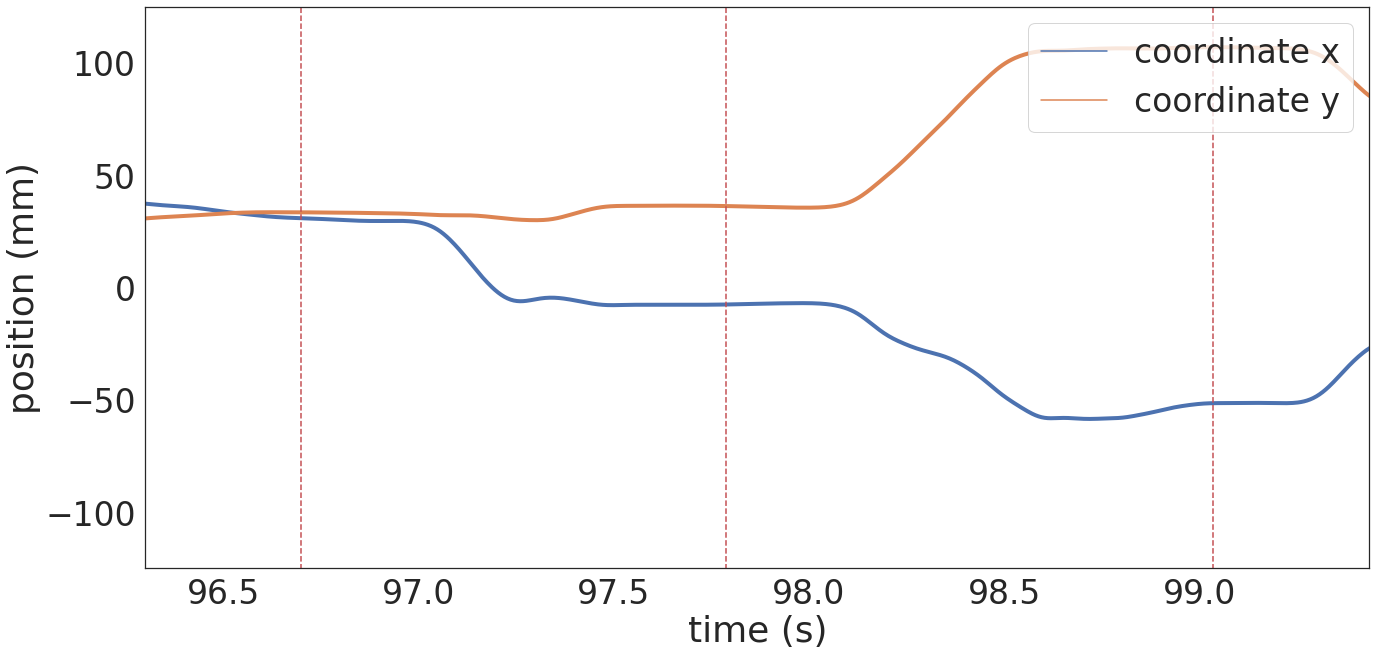

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
rmin = trail_end_0 - 100
rmax = trail_end_2 + 100
tmin, tmax = t[rmin], t[rmax]
sns.lineplot(data=df_kin, x='time (s)', y='position (mm)', hue='axis', linewidth='4')
ax.set_xlim(t[rmin], t[rmax])
ax.set_ylim(-125, 125)
ax.axvline(t[trail_end_0], -125, 125, linestyle='--', color='r')  # A
ax.axvline(t[trail_end_1], -125, 125, linestyle='--', color='r')  # B
ax.axvline(t[trail_end_2], -125, 125, linestyle='--', color='r')  # C
ax.legend(loc=1)
plt.tight_layout()